# decidimos fazer a regressão sobre os dados faltantes do home_shots_target

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/pre_processing_data/normalizaded_matches.csv", index_col=0)
df = matches_info_df.copy()
matches_info_df

,result,performance_rank_home,B365H,B365D,B365A,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,...,B365D_classification_0,B365D_classification_1,B365D_classification_2,B365D_classification_3,B365D_classification_4,B365A_classification_0,B365A_classification_1,B365A_classification_2,B365A_classification_3,B365A_classification_4
0,0.090909,0.473684,-0.953510,-0.871429,-0.680040,0.157895,-1.000000,-1.000000,-0.333333,-0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.272727,-0.263158,-0.741112,-0.928571,-0.953862,0.684211,-1.000000,-1.000000,-0.666667,-0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.272727,-0.368421,-0.923428,-0.914286,-0.830491,-0.789474,-1.000000,-1.000000,-0.333333,-1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.454545,-0.894737,-0.868733,-0.942857,-0.905717,-0.157895,-1.000000,-1.000000,-1.000000,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.636364,-1.000000,-0.504102,-0.857143,-0.975426,0.789474,-1.000000,-1.000000,-1.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,-0.978122,-0.571429,-0.504514,0.368421,0.853333,-0.146667,-0.333333,-1.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
376,-0.454545,0.473684,-0.979945,-0.500000,-0.504514,-0.789474,0.333333,-0.593333,-1.000000,-0.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377,-0.090909,-0.578947,-0.965360,-0.750000,-0.629890,-1.000000,-0.186667,-0.780000,-0.666667,-0.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
378,-0.090909,0.684211,-0.896080,-0.928571,-0.880642,0.263158,0.373333,-0.293333,-0.333333,-0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Vamos fazer a classificação para estimar se o time da casa é super favorito, favorito, jogo com cara de empate, azarão ou super azarão

### lembrando que quanto menor a odd, mais favorito um time é



In [3]:
matches_info_df[["B365H", "B365H_classification_0","B365H_classification_1", "B365H_classification_2", "B365H_classification_3", "B365H_classification_4", ]]


,B365H,B365H_classification_0,B365H_classification_1,B365H_classification_2,B365H_classification_3,B365H_classification_4
0,-0.953510,1.0,0.0,0.0,0.0,0.0
1,-0.741112,0.0,0.0,1.0,0.0,0.0
2,-0.923428,1.0,0.0,0.0,0.0,0.0
3,-0.868733,0.0,1.0,0.0,0.0,0.0
4,-0.504102,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
375,-0.978122,1.0,0.0,0.0,0.0,0.0
376,-0.979945,1.0,0.0,0.0,0.0,0.0
377,-0.965360,1.0,0.0,0.0,0.0,0.0
378,-0.896080,0.0,1.0,0.0,0.0,0.0


In [4]:
matches_info_df.rename(columns={
    "B365H_classification_0": "Home_super_fav",
    "B365H_classification_1": "Home_fav",
    "B365H_classification_2": "draw_fav",
    "B365H_classification_3": "Away_fav",
    "B365H_classification_4": "Away_super_fav"
}, inplace=True)
matches_info_df[["result", "B365H", "Home_super_fav","Home_fav", "draw_fav", "Away_fav", "Away_super_fav"]]


,result,B365H,Home_super_fav,Home_fav,draw_fav,Away_fav,Away_super_fav
0,0.090909,-0.953510,1.0,0.0,0.0,0.0,0.0
1,-0.272727,-0.741112,0.0,0.0,1.0,0.0,0.0
2,0.272727,-0.923428,1.0,0.0,0.0,0.0,0.0
3,-0.454545,-0.868733,0.0,1.0,0.0,0.0,0.0
4,-0.636364,-0.504102,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
375,0.272727,-0.978122,1.0,0.0,0.0,0.0,0.0
376,-0.454545,-0.979945,1.0,0.0,0.0,0.0,0.0
377,-0.090909,-0.965360,1.0,0.0,0.0,0.0,0.0
378,-0.090909,-0.896080,0.0,1.0,0.0,0.0,0.0


### iremos estimar a odd dos jogos, ou seja, utilizaremos regressão

Então, a variavel dependente do meu modelo será B365H, a odd do time da casa

As features que usaremos para o nosso modelo de regressão serão selecionadas a partir do nosso conhecimento sobre o dominio que obtivemos a partir da nossa analise descritiva dos dados la atras, isso aliado a analise de correlação nós ajudará a indentificar quais variaveis tem uma forte correlação com a variavel alvo


Primeiro vamos remover as colunas que são derivadas da B365H

In [5]:
regression_b365h_df = matches_info_df.drop(['home_team_shots_on_target_dirty','B365D', 'B365D', 'B365A', 'B365H_log', 'B365D_log', 'B365A_log', 'Home_super_fav', 'Home_fav','draw_fav','Away_fav', 'B365D_classification_0', 'B365D_classification_1', 'B365D_classification_2', 'B365D_classification_3', 'B365D_classification_4', 'B365A_classification_0', 'B365A_classification_1', 'B365A_classification_2', 'B365A_classification_3', 'B365A_classification_4'], axis=1)


In [6]:
# Calcular a correlação de Spearman de todas as colunas com 'B365H'
correlation_matrix = regression_b365h_df.corr(method='spearman')
b365h_corr = correlation_matrix['B365H']

# Filtrar correlações acima de 0.35 ou abaixo de -0.35
b365h_filtered_corr = b365h_corr[b365h_corr.abs() > 0.35]
b365h_filtered_corr

result                               -0.534834
performance_rank_home                -0.668404
B365H                                 1.000000
away_performance_rank                 0.672120
Pre-Match PPG (Home)                 -0.475464
Pre-Match PPG (Away)                  0.513770
home_team_goal_count                 -0.422411
away_team_goal_count                  0.384664
home_team_shots                      -0.474998
home_team_shots_on_target_original   -0.493045
home_team_corner_count               -0.398645
away_team_shots                       0.424244
away_team_shots_on_target             0.382638
away_team_corner_count                0.381534
home_season_shots                    -0.553766
home_season_shots_on_target          -0.635610
Name: B365H, dtype: float64

In [7]:
# Criar uma lista com os nomes das colunas que têm uma boa correlação com 'B365H'
columns_to_keep = b365h_filtered_corr.index.tolist()

# Criar um novo DataFrame apenas com essas colunas
filtered_regression_b365h_df = regression_b365h_df[columns_to_keep]

filtered_regression_b365h_df

,result,performance_rank_home,B365H,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),home_team_goal_count,away_team_goal_count,home_team_shots,home_team_shots_on_target_original,home_team_corner_count,away_team_shots,away_team_shots_on_target,away_team_corner_count,home_season_shots,home_season_shots_on_target
0,0.090909,0.473684,-0.953510,0.157895,-1.000000,-1.000000,-0.333333,-0.666667,-0.384615,-0.066667,-0.764706,-0.294118,-0.230769,-0.285714,-0.043478,0.541667
1,-0.272727,-0.263158,-0.741112,0.684211,-1.000000,-1.000000,-0.666667,-0.333333,-0.153846,-0.600000,-0.647059,0.294118,-0.076923,-0.285714,-0.362319,-0.437500
2,0.272727,-0.368421,-0.923428,-0.789474,-1.000000,-1.000000,-0.333333,-1.000000,-0.153846,-0.333333,-0.176471,-0.411765,-0.692308,-0.428571,-0.681159,-0.395833
3,-0.454545,-0.894737,-0.868733,-0.157895,-1.000000,-1.000000,-1.000000,-0.333333,-0.153846,-0.066667,-0.411765,0.058824,0.692308,-0.285714,-0.217391,-0.375000
4,-0.636364,-1.000000,-0.504102,0.789474,-1.000000,-1.000000,-1.000000,0.000000,-0.538462,-0.733333,-0.764706,-0.294118,-0.230769,-0.285714,-1.000000,-0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.272727,0.894737,-0.978122,0.368421,0.853333,-0.146667,-0.333333,-1.000000,-0.153846,-0.200000,-0.529412,-0.411765,-0.538462,-0.857143,0.420290,0.541667
376,-0.454545,0.473684,-0.979945,-0.789474,0.333333,-0.593333,-1.000000,-0.333333,0.615385,0.466667,0.294118,0.058824,-0.230769,-0.714286,-0.043478,0.541667
377,-0.090909,-0.578947,-0.965360,-1.000000,-0.186667,-0.780000,-0.666667,-0.666667,-0.461538,-0.466667,-0.529412,-0.294118,-0.384615,-0.571429,-0.449275,-0.229167
378,-0.090909,0.684211,-0.896080,0.263158,0.373333,-0.293333,-0.333333,-0.333333,-0.307692,-0.466667,-0.176471,0.294118,0.538462,-0.428571,-0.028986,0.104167


 Separar os Dados em Variáveis Independentes e Dependentes:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Variável dependente (target)
y = filtered_regression_b365h_df['B365H']

# Variáveis independentes (features)
X = filtered_regression_b365h_df.drop(['B365H'], axis=1)


agora vamos separar os dados de treinamento e teste

In [9]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


como os dados ja estão normalizados então não será necessario

Treinar o Modelo de Regressão

In [10]:
# Inicializar e treinar o modelo de regressão
modelo = RandomForestRegressor(random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Fazer Previsões

In [11]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)


Avaliar a performance do modelo

In [12]:
# Avaliar a performance do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio: {mse:.2f}')
print(f'R²: {r2:.2f}')


Erro Quadrático Médio: 0.02
R²: 0.81


Erro Quadrático Médio (MSE): 0.02

Isso significa que, em média, os quadrados dos erros entre as previsões do modelo e os valores reais são de 0.02 unidades. Um MSE de 0.02 é geralmente considerado bastante baixo, o que indica que o modelo está fazendo previsões precisas.
Coeficiente de Determinação (R²): 0.81

Isso indica que o modelo explica aproximadamente 81% da variabilidade presente nos dados de teste. Um R² de 0.81 é bastante bom, pois sugere que o modelo é capaz de capturar a maior parte da variação nos dados de teste, o que é um bom indicativo de que o modelo está se ajustando bem aos dados.
Interpretação:
MSE: O baixo valor de 0.02 indica que o modelo está fazendo previsões muito próximas aos valores reais, em média.

R²: O alto valor de 0.81 indica que o modelo é capaz de explicar uma quantidade significativa da variabilidade nos dados de teste.

Esses resultados são positivos e sugerem que o modelo de regressão está performando bem com base nas métricas fornecidas. No entanto, é importante considerar o contexto específico do problema e se esses valores atendem aos critérios de desempenho desejados para sua aplicação específica.

1. Separar os dados em treinamento, validação e teste
Primeiro, vamos dividir os dados em três conjuntos: treinamento, validação e teste.

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separar as variáveis dependente e independentes
X = filtered_regression_b365h_df.drop(['B365H'], axis=1)
y = filtered_regression_b365h_df['B365H']

# Dividir os dados em treinamento e conjunto intermediário (70% treinamento, 30% intermediário)
X_train, X_intermediate, y_train, y_intermediate = train_test_split(X, y, test_size=0.30, random_state=42)

# Dividir o conjunto intermediário em validação (50% de 30% -> 15%) e teste (50% de 30% -> 15%)
X_val, X_test, y_val, y_test = train_test_split(X_intermediate, y_intermediate, test_size=0.5, random_state=42)

# Exibir o tamanho de cada conjunto
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} linhas")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]} linhas")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} linhas")


Tamanho do conjunto de treinamento: 266 linhas
Tamanho do conjunto de validação: 57 linhas
Tamanho do conjunto de teste: 57 linhas


2. Selecionar 4 algoritmos de regressão
Podemos escolher alguns dos algoritmos mais comuns para regressão:

Regressão Linear

Regressão Ridge

Random Forest

Gradient Boosting

Regressão linear:

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instanciar o modelo de Regressão Linear
linear_regression_model = LinearRegression()

# Treinar o modelo
linear_regression_model.fit(X_train, y_train)

# Fazer predições no conjunto de validação
y_val_pred = linear_regression_model.predict(X_val)

# Avaliar o modelo usando Mean Squared Error
mse = mean_squared_error(y_val, y_val_pred)
print(f"MSE no conjunto de validação: {mse}")

MSE no conjunto de validação: 0.025563358387691304


Adicionar MLFlow no Treinamento dos Modelos
Agora vamos adicionar o MLFlow para rastrear o treinamento do modelo de regressão linear.

In [18]:
import mlflow
import mlflow.sklearn

# Configurar o MLFlow para salvar os logs localmente
mlflow.set_tracking_uri("file:///mnt/mlruns")
mlflow.set_experiment("Regressão de Odds de Futebol")

# Função para treinamento e registro do modelo com MLFlow
def train_and_log_model(model, X_train, y_train, X_val, y_val, model_name):
    with mlflow.start_run():
        # Treinar o modelo
        model.fit(X_train, y_train)
        
        # Fazer predições no conjunto de validação
        predictions = model.predict(X_val)
        
        # Calcular a métrica de avaliação (Mean Squared Error)
        mse = mean_squared_error(y_val, predictions)
        
        # Logar a métrica no MLFlow
        mlflow.log_metric("mse", mse)
        
        # Logar os parâmetros do modelo no MLFlow
        mlflow.log_params(model.get_params())
        
        # Logar o modelo no MLFlow
        mlflow.sklearn.log_model(model, model_name)
        
        return mse

# Chamar a função para treinar e logar o modelo de regressão linear
mse = train_and_log_model(linear_regression_model, X_train, y_train, X_val, y_val, "LinearRegression")
print(f"MSE registrado no MLFlow: {mse}")

MSE registrado no MLFlow: 0.025563358387691304



Claro, podemos usar o GridSearchCV para selecionar os melhores hiperparâmetros do modelo de Regressão Linear no conjunto de validação. Apesar de o modelo de Regressão Linear ter poucos hiperparâmetros, podemos explorar algumas variações, como a inclusão de regularização (Ridge).

Passos para Selecionar Hiperparâmetros com GridSearchCV
1. Configurar GridSearchCV para Regressão Linear
Para a Regressão Linear simples, não há muitos hiperparâmetros para ajustar. No entanto, para ilustrar, podemos incluir um modelo de Regressão Ridge, que permite ajustar o hiperparâmetro alpha de regularização.

2. Executar GridSearchCV
Vamos configurar e executar o GridSearchCV no modelo de Regressão Ridge, que é uma versão regularizada da Regressão Linear.

Implementação
Configuração do GridSearchCV para Regressão Ridge

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Definir o modelo e os hiperparâmetros a serem testados
ridge_model = Ridge()
param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}

# Configurar o GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter o melhor modelo e hiperparâmetros
best_ridge_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Melhores hiperparâmetros: {best_params}")
print(f"Melhor MSE no conjunto de validação: {best_mse}")

Melhores hiperparâmetros: {'alpha': 10.0}
Melhor MSE no conjunto de validação: 0.04630571029495988


Adicionar MLFlow no Processo de Seleção de Hiperparâmetros
Vamos adicionar MLFlow para registrar o processo de seleção de hiperparâmetros.

In [20]:
import mlflow
import mlflow.sklearn

# Configurar o MLFlow para salvar os logs localmente
mlflow.set_tracking_uri("file:///mnt/mlruns")
mlflow.set_experiment("Regressão de Odds de Futebol")

# Função para treinar e registrar o modelo com GridSearchCV e MLFlow
def train_and_log_ridge_model(X_train, y_train, X_val, y_val):
    with mlflow.start_run():
        # Definir o modelo e os hiperparâmetros a serem testados
        ridge_model = Ridge()
        param_grid = {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
        
        # Configurar e executar o GridSearchCV
        grid_search = GridSearchCV(ridge_model, param_grid, cv=3, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        
        # Obter o melhor modelo e hiperparâmetros
        best_ridge_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        best_mse = -grid_search.best_score_
        
        # Fazer predições no conjunto de validação
        y_val_pred = best_ridge_model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        
        # Logar as métricas e hiperparâmetros no MLFlow
        mlflow.log_metric("validation_mse", val_mse)
        mlflow.log_params(best_params)
        mlflow.sklearn.log_model(best_ridge_model, "RidgeModel")
        
        print(f"Melhores hiperparâmetros: {best_params}")
        print(f"Melhor MSE no conjunto de validação: {best_mse}")
        print(f"MSE no conjunto de validação registrado no MLFlow: {val_mse}")
        
        return best_ridge_model, best_params, best_mse

# Chamar a função para treinar e logar o modelo de Regressão Ridge
best_ridge_model, best_params, best_mse = train_and_log_ridge_model(X_train, y_train, X_val, y_val)

Melhores hiperparâmetros: {'alpha': 10.0}
Melhor MSE no conjunto de validação: 0.04630571029495988
MSE no conjunto de validação registrado no MLFlow: 0.02290029150861481


3. Adicionar MLFlow no treinamento dos modelos para rastreamento
Vamos configurar o MLFlow para rastrear os experimentos.

In [15]:
import mlflow
import mlflow.sklearn

# Configurar o MLFlow para salvar os logs localmente
mlflow.set_tracking_uri("file:///mnt/mlruns")

# Nome do experimento
mlflow.set_experiment("Regressão de Odds de Futebol")

# Função para treinamento e registro de modelos
def train_and_log_model(model, X_train, y_train, X_val, y_val, model_name):
    with mlflow.start_run():
        # Treinar o modelo
        model.fit(X_train, y_train)
        
        # Predizer no conjunto de validação
        predictions = model.predict(X_val)
        
        # Calcular métricas de avaliação (usando Mean Squared Error como exemplo)
        mse = mean_squared_error(y_val, predictions)
        
        # Logar métricas no MLFlow
        mlflow.log_metric("mse", mse)
        
        # Logar parâmetros do modelo no MLFlow
        mlflow.log_params(model.get_params())
        
        # Logar o modelo no MLFlow
        mlflow.sklearn.log_model(model, model_name)

        return mse


4. Executar uma ferramenta de seleção de hiperparâmetros
Vamos utilizar GridSearchCV para encontrar os melhores hiperparâmetros para cada modelo.

In [16]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Definir os modelos e os hiperparâmetros a serem testados
models = {
    "LinearRegression": (LinearRegression(), {}),
    "Ridge": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    "RandomForest": (RandomForestRegressor(), {"n_estimators": [10, 50, 100]}),
    "GradientBoosting": (GradientBoostingRegressor(), {"learning_rate": [0.01, 0.1, 0.2]})
}

best_models = {}

# Executar GridSearchCV para cada modelo
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Logar o melhor modelo e hiperparâmetros no MLFlow
    best_mse = train_and_log_model(grid_search.best_estimator_, X_train, y_train, X_val, y_val, model_name)
    
    # Salvar o melhor modelo
    best_models[model_name] = (grid_search.best_estimator_, best_mse)

# Selecionar o melhor modelo
best_model_name, (best_model, best_model_mse) = min(best_models.items(), key=lambda x: x[1][1])

print(f"Melhor modelo: {best_model_name} com MSE: {best_model_mse}")

Melhor modelo: RandomForest com MSE: 0.003025255510613541


5. Realizar diagnóstico do melhor modelo
Para diagnosticar e melhorar o melhor modelo, podemos analisar os resíduos e outras métricas.

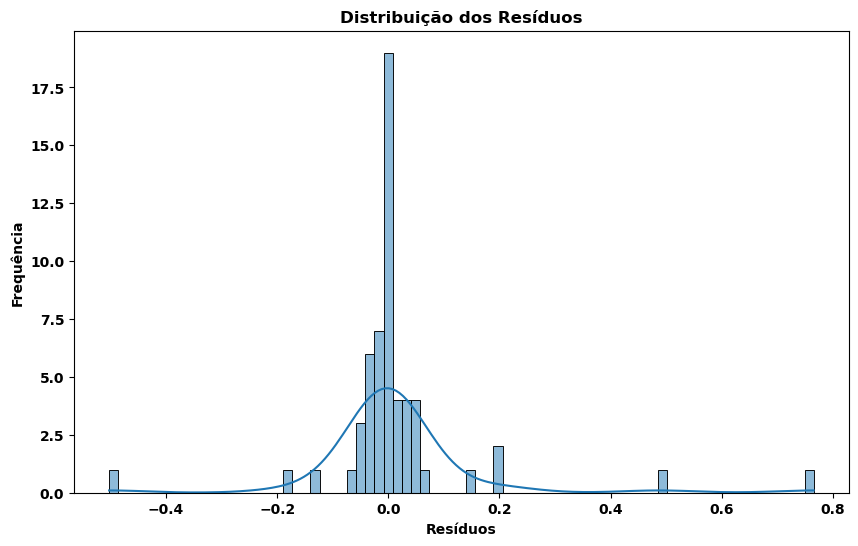

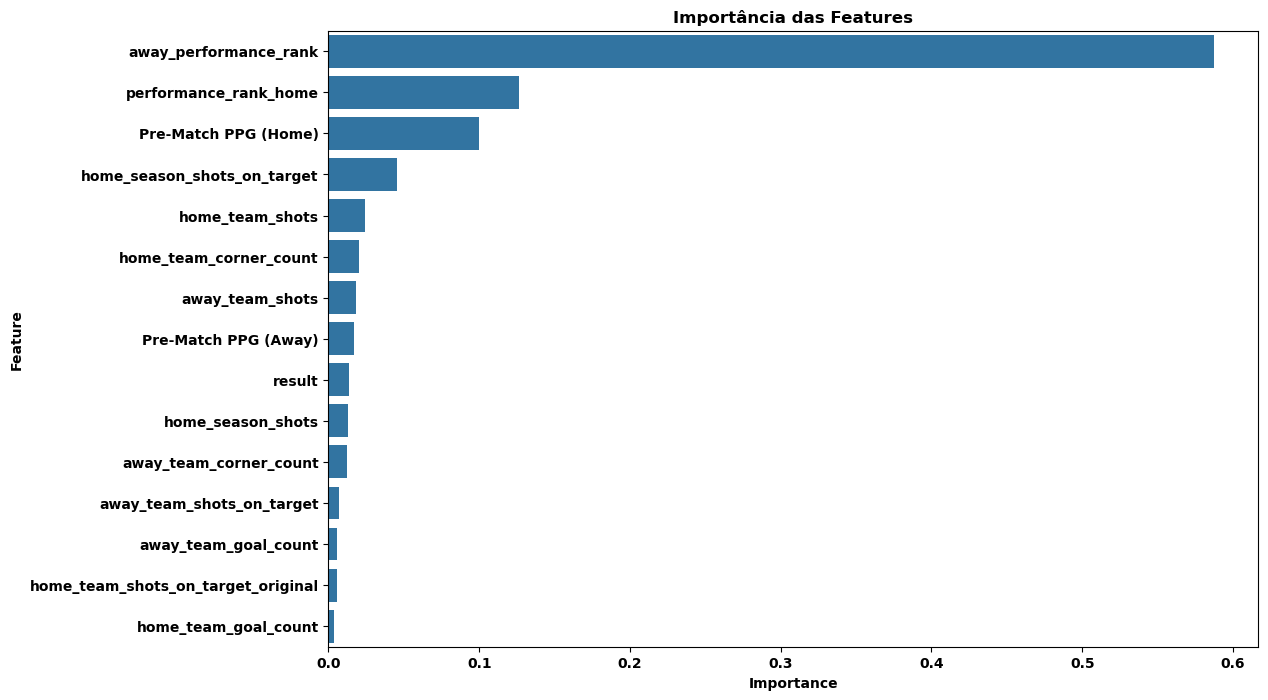

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predizer no conjunto de teste
y_pred_test = best_model.predict(X_test)

# Calcular e plotar os resíduos
residuals = y_test - y_pred_test

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Resíduos')
plt.show()

# Analisar a importância das features (para modelos de árvore, por exemplo)
if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    features = X_train.columns
    importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importances_df)
    plt.title('Importância das Features')
    plt.show()